### El objetivo de este proyecto busca recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa acerca de la evasión de clientes en los contratos en telecomunicaciones de la Empresa Telecom. A partir del siguiente análisis, se podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.


###**Importación de bibliotecas y datos**


In [90]:
import pandas as pd
import numpy as np
import json
import requests

In [91]:
Churn_de_Clientes = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [92]:
df = pd.read_json(Churn_de_Clientes)

### **Limpieza y tratamiento de los datos**

In [93]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [95]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


### **Normalizando los diccionarios**




In [96]:
df_customer = pd.json_normalize(df['customer'])
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [97]:
df_phone = pd.json_normalize(df['phone'])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [98]:
df_internet = pd.json_normalize(df['internet'])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [99]:
df_account= pd.json_normalize(df['account'])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [100]:
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [101]:
df_final.columns


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [102]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [103]:
cols_bool = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for col in cols_bool:
    df_final[col] = df_final[col].map({'Yes': True, 'No': False})
    df_final[col] = df_final[col].astype(bool)


In [104]:
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(bool)

In [105]:
df_final['MultipleLines'] = df_final['MultipleLines'].map({'Yes': True, 'No': False, 'No phone service': False})
df_final['MultipleLines'] = df_final['MultipleLines'].astype(bool)

In [106]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [107]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [108]:
df_final['customerID'].duplicated().sum()

np.int64(0)

In [109]:
df_final['customerID'].nunique()

7267

In [110]:
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [111]:
df_final['Churn'] = df_final['Churn'].astype(str).str.strip()
df_final['Churn'] = df_final['Churn'].replace('', np.nan)
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [112]:
df_final = df_final.dropna(subset=['Churn'])
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [113]:
df_final['Churn'] = df_final['Churn'].map({'Yes': True, 'No': False})
df_final['Churn'].value_counts()

/tmp/ipython-input-113-931472461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Churn'] = df_final['Churn'].map({'Yes': True, 'No': False})


,count
Churn,
False,5174
True,1869


In [114]:
df_final['Churn'].astype(np.bool)
df_final['Churn']

,Churn
0,False
1,False
2,True
3,True
4,True
...,...
7262,False
7263,True
7264,False
7265,False


In [115]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  Contract          7043 non-null   object 
 17  

In [116]:
df_final['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [117]:
df_final['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
False,5901
True,1142


In [118]:
df_final['Partner'].value_counts()

,count
Partner,
False,3641
True,3402


In [119]:
df_final['Dependents'].value_counts()

,count
Dependents,
False,4933
True,2110


In [120]:
df_final['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [121]:
df_final['Charges.Total'].value_counts()

,count
Charges.Total,
20.2,11
,11
19.75,9
19.9,8
19.65,8
...,...
829.55,1
625.65,1
462.8,1


In [122]:
df_final.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


###**Espacios vacios**

In [123]:
df_final['Charges.Total'] = df_final['Charges.Total'].astype(str)

/tmp/ipython-input-123-3805829942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = df_final['Charges.Total'].astype(str)


In [124]:
df_final['Charges.Total'] = df_final['Charges.Total'].apply(lambda x: x.strip())


/tmp/ipython-input-124-2723979316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = df_final['Charges.Total'].apply(lambda x: x.strip())


In [125]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'].str.strip(), errors='coerce')

/tmp/ipython-input-125-3053346819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'].str.strip(), errors='coerce')


In [126]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   bool   
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   bool   
 11  OnlineBackup      7043 non-null   bool   
 12  DeviceProtection  7043 non-null   bool   
 13  TechSupport       7043 non-null   bool   
 14  StreamingTV       7043 non-null   bool   
 15  StreamingMovies   7043 non-null   bool   
 16  Contract          7043 non-null   object 
 17  

In [127]:
cols_category = ['InternetService', 'Contract', 'PaymentMethod']

for col in cols_category:
    df_final[col] = df_final[col].astype('category')

/tmp/ipython-input-127-3190693096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = df_final[col].astype('category')
/tmp/ipython-input-127-3190693096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = df_final[col].astype('category')
/tmp/ipython-input-127-3190693096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [128]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   Churn             7043 non-null   bool    
 2   gender            7043 non-null   object  
 3   SeniorCitizen     7043 non-null   bool    
 4   Partner           7043 non-null   bool    
 5   Dependents        7043 non-null   bool    
 6   tenure            7043 non-null   int64   
 7   PhoneService      7043 non-null   bool    
 8   MultipleLines     7043 non-null   bool    
 9   InternetService   7043 non-null   category
 10  OnlineSecurity    7043 non-null   bool    
 11  OnlineBackup      7043 non-null   bool    
 12  DeviceProtection  7043 non-null   bool    
 13  TechSupport       7043 non-null   bool    
 14  StreamingTV       7043 non-null   bool    
 15  StreamingMovies   7043 non-null   bool    
 16  Contract          7043 non-nu

In [129]:
df_final['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [130]:
df_final['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [131]:
df_final['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [132]:
df_final['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
True,3545
False,3498


In [133]:
df_final['OnlineBackup'].value_counts()

,count
OnlineBackup,
True,3955
False,3088


In [134]:
df_final[df_final['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,False,Female,False,True,True,0,False,False,DSL,...,True,True,True,True,False,Two year,False,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,False,True,True,0,True,False,No,...,True,True,True,True,True,Two year,False,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,False,False,True,0,True,True,DSL,...,True,False,True,False,False,Two year,True,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,False,True,True,0,True,False,No,...,True,True,True,True,True,One year,True,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,False,False,True,0,True,False,No,...,True,True,True,True,True,Two year,False,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,False,True,True,0,True,True,No,...,True,True,True,True,True,Two year,False,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,False,True,True,0,True,True,DSL,...,True,True,True,True,False,Two year,False,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,False,True,True,0,True,True,No,...,True,True,True,True,True,Two year,False,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,False,True,True,0,False,False,DSL,...,False,True,True,True,False,Two year,True,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,False,True,True,0,True,False,DSL,...,True,True,False,True,True,Two year,False,Mailed check,80.85,NaN


In [135]:
df_final = df_final.dropna(subset=['Charges.Total'])


In [136]:
df_final['Charges.Total'].isna().sum()

np.int64(0)

###**Columna de Cuentas_Diarias**

In [137]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30
df_final.head()


/tmp/ipython-input-137-1454450542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [138]:
df_final['Cuentas_Diarias'].dtype

dtype('float64')

### **Análisis Exploratorio de los Datos**

In [139]:
df_final.describe()

,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


In [140]:
df_final.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total']].describe()

tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
False  5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0   
True   1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      Charges.Monthly             ...                 Charges.Total  \
                count       mean  ...     75%     max         count   
Churn                             ...                                 
False          5163.0  61.307408  ...  88.475  118.75        5163.0   
True           1869.0  74.441332  ...  94.200  118.35        1869.0   

                                                                             
              mean          std    min      25%      50%       75%      max  
Churn                                                                        
False  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125  8672.45  
True   1531.796094  1890.822994  18.85  134.500   703.55  2331.300  8684.80  

[2 rows x 24 columns]

### **Distribución de evasión**

/tmp/ipython-input-141-1237106527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='Churn', palette='pastel')


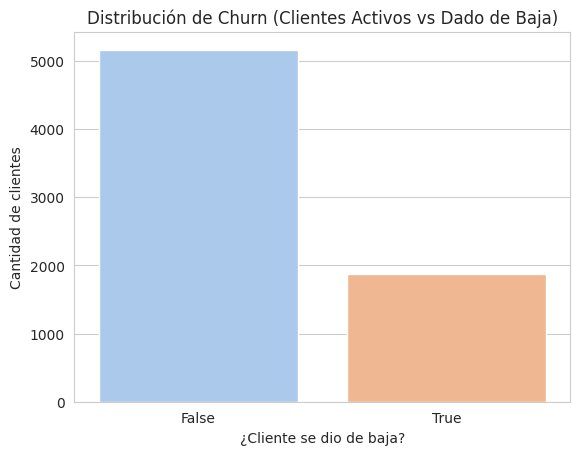

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.countplot(data=df_final, x='Churn', palette='pastel')
plt.title('Distribución de Churn (Clientes Activos vs Dado de Baja)')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()

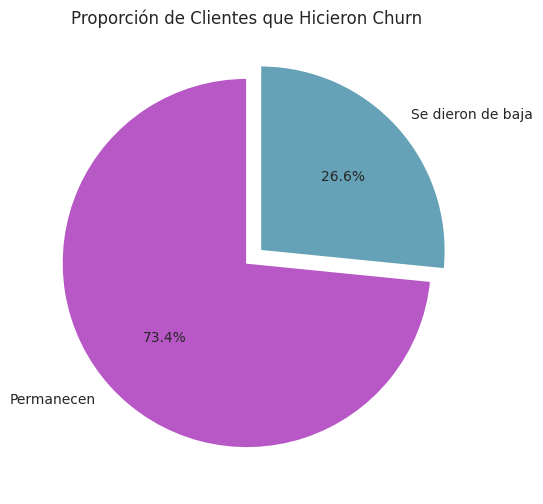

In [189]:
churn_counts = df_final['Churn'].value_counts()
labels = ['Permanecen', 'Se dieron de baja']
colors = ['#B758C6', '#66A2B7']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=[0, 0.1])
plt.title('Proporción de Clientes que Hicieron Churn')
plt.show()

In [143]:
df_final['gender'].head()

,gender
0,Female
1,Male
2,Male
3,Male
4,Female


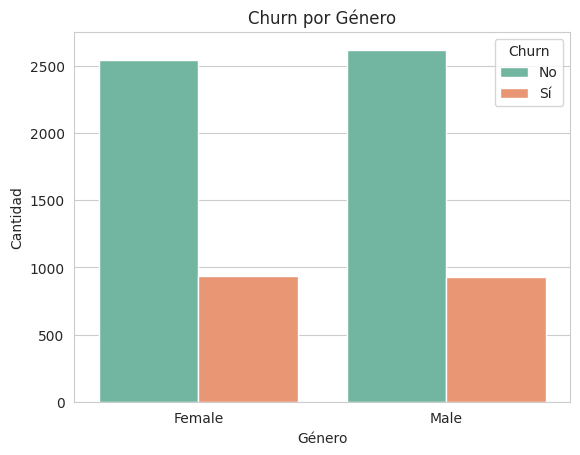

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_final, x='gender', hue='Churn', palette='Set2')
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Churn',labels=['No', 'Sí'])
plt.show()



In [145]:
df_final[['Churn', 'gender']].value_counts().reset_index(name='Cantidad')

,Churn,gender,Cantidad
0,False,Male,2619
1,False,Female,2544
2,True,Female,939
3,True,Male,930


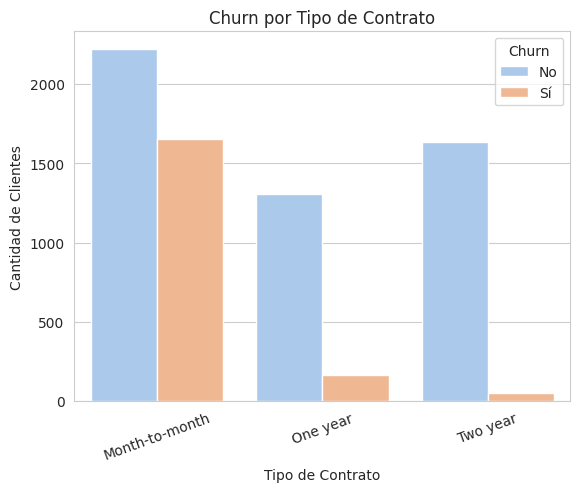

In [188]:
sns.countplot(data=df_final, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=20)
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

In [147]:
df_final[['Churn', 'Contract']].value_counts().reset_index(name='Cantidad')

,Churn,Contract,Cantidad
0,False,Month-to-month,2220
1,True,Month-to-month,1655
2,False,Two year,1637
3,False,One year,1306
4,True,One year,166
5,True,Two year,48


In [148]:
tabla_churn_contrato = pd.crosstab(df_final['Contract'], df_final['Churn'], normalize='index') * 100
tabla_churn_contrato = tabla_churn_contrato.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_contrato

Churn,No_Churn (%),Churn (%)
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


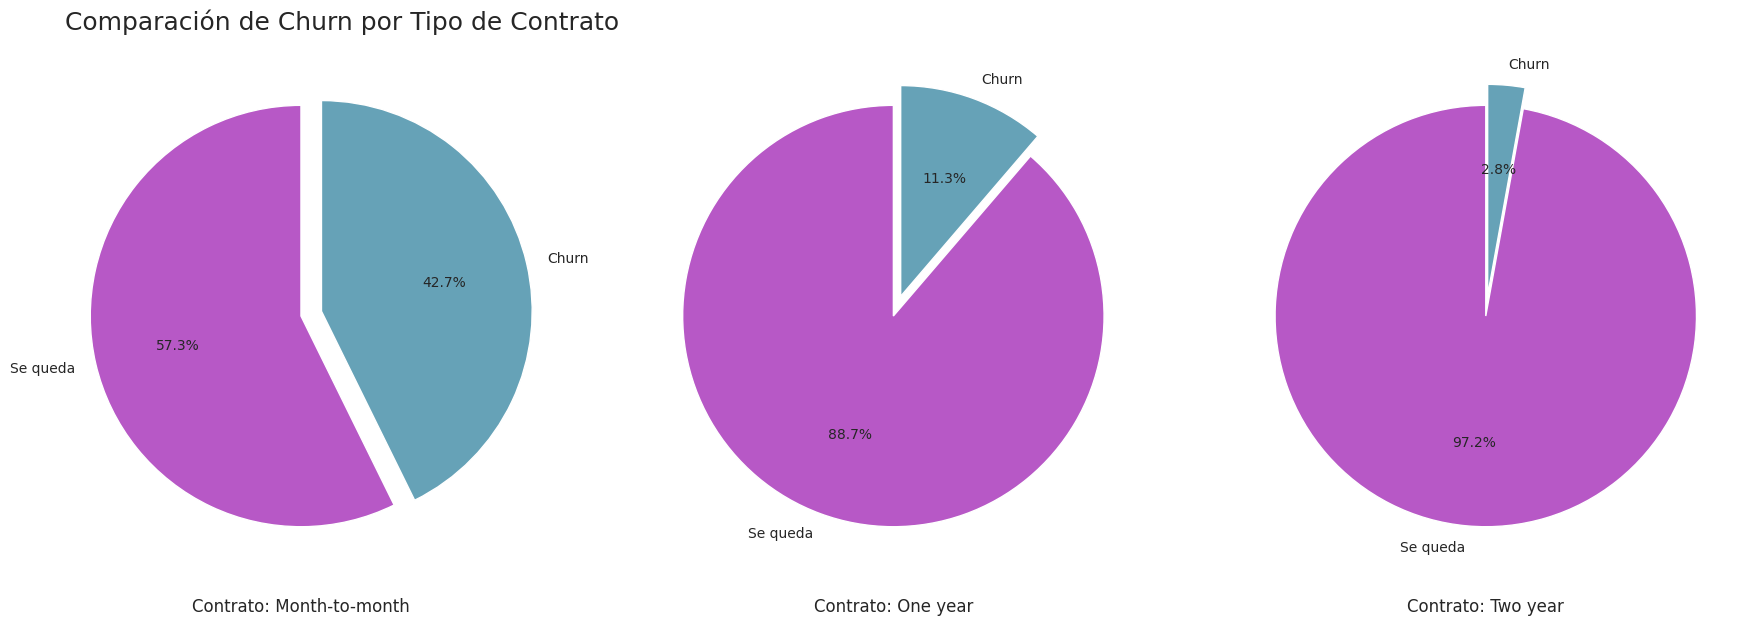

In [186]:
datos = {
    'Month-to-month': [57.29, 42.71],
    'One year': [88.72, 11.28],
    'Two year': [97.15, 2.85]
}

etiquetas = ['Se queda', 'Churn']
colores = ['#B758C6', '#66A2B7']

# Crear figura
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, (contrato, valores) in enumerate(datos.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'Contrato: {contrato}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Tipo de Contrato', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

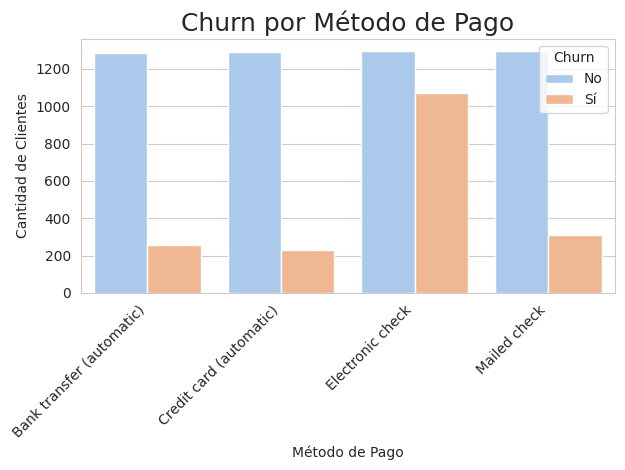

In [150]:
sns.countplot(data=df_final, x='PaymentMethod', hue='Churn', palette='pastel')
plt.title('Churn por Método de Pago', fontsize=18)
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

In [151]:
df_final[['Churn', 'PaymentMethod']].value_counts().reset_index(name='Cantidad')

,Churn,PaymentMethod,Cantidad
0,False,Mailed check,1296
1,False,Electronic check,1294
2,False,Credit card (automatic),1289
3,False,Bank transfer (automatic),1284
4,True,Electronic check,1071
5,True,Mailed check,308
6,True,Bank transfer (automatic),258
7,True,Credit card (automatic),232


In [152]:
tabla_churn_paymentmethod = pd.crosstab(df_final['PaymentMethod'], df_final['Churn'], normalize='index') * 100
tabla_churn_paymentmethod = tabla_churn_paymentmethod.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_paymentmethod

Churn,No_Churn (%),Churn (%)
PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


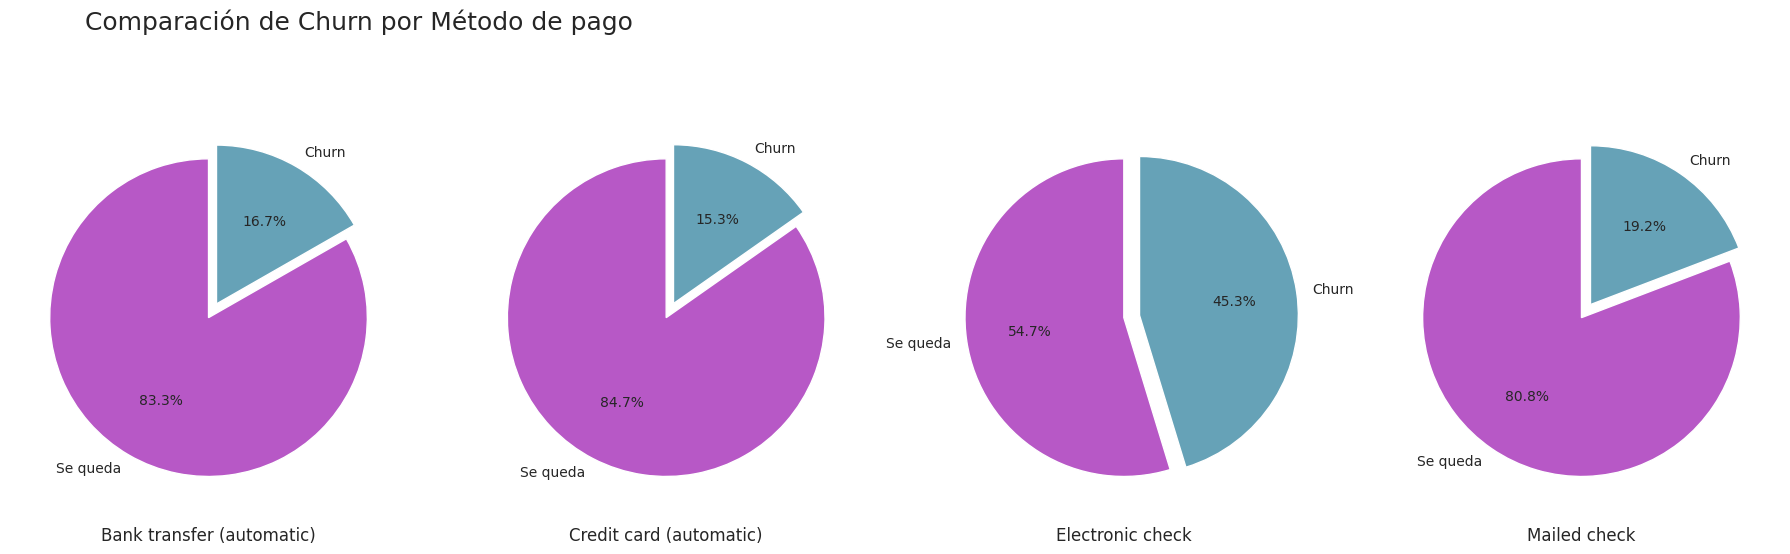

In [185]:
datos_1 = {
    'Bank transfer (automatic)': [83.26, 16.73],
    'Credit card (automatic)': [84.74, 15.25],
    'Electronic check': [54.71, 45.28],
    'Mailed check': [80.79, 19.20]
}

etiquetas = ['Se queda', 'Churn']
colores = ['#B758C6', '#66A2B7']

# Crear figura
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

for i, (payment, valores) in enumerate(datos_1.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{payment}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Método de pago', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

In [154]:
df_final[['Churn', 'PaperlessBilling']].value_counts().reset_index(name='Cantidad')

,Churn,PaperlessBilling,Cantidad
0,False,True,2768
1,False,False,2395
2,True,True,1400
3,True,False,469


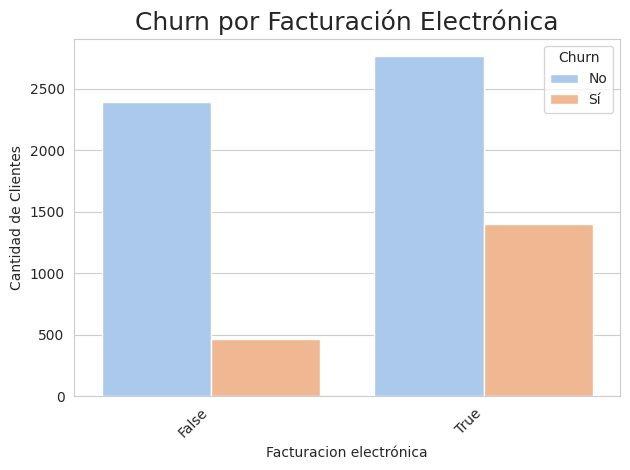

In [155]:
sns.countplot(data=df_final, x='PaperlessBilling', hue='Churn', palette='pastel')
plt.title('Churn por Facturación Electrónica', fontsize=18)
plt.xlabel('Facturacion electrónica')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

In [156]:
tabla_churn_paperless = pd.crosstab(df_final['PaperlessBilling'], df_final['Churn'], normalize='index') * 100
tabla_churn_paperless = tabla_churn_paperless.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_paperless

Churn,No_Churn (%),Churn (%)
PaperlessBilling,,
False,83.624302,16.375698
True,66.410749,33.589251


In [157]:
df_final[['Churn', 'Dependents']].value_counts().reset_index(name='Cantidad')

,Churn,Dependents,Cantidad
0,False,False,3390
1,False,True,1773
2,True,False,1543
3,True,True,326


In [158]:
tabla_churn_dependents = pd.crosstab(df_final['Dependents'], df_final['Churn'], normalize='index') * 100
tabla_churn_dependents = tabla_churn_dependents.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_dependents

Churn,No_Churn (%),Churn (%)
Dependents,,
False,68.720860,31.279140
True,84.468795,15.531205


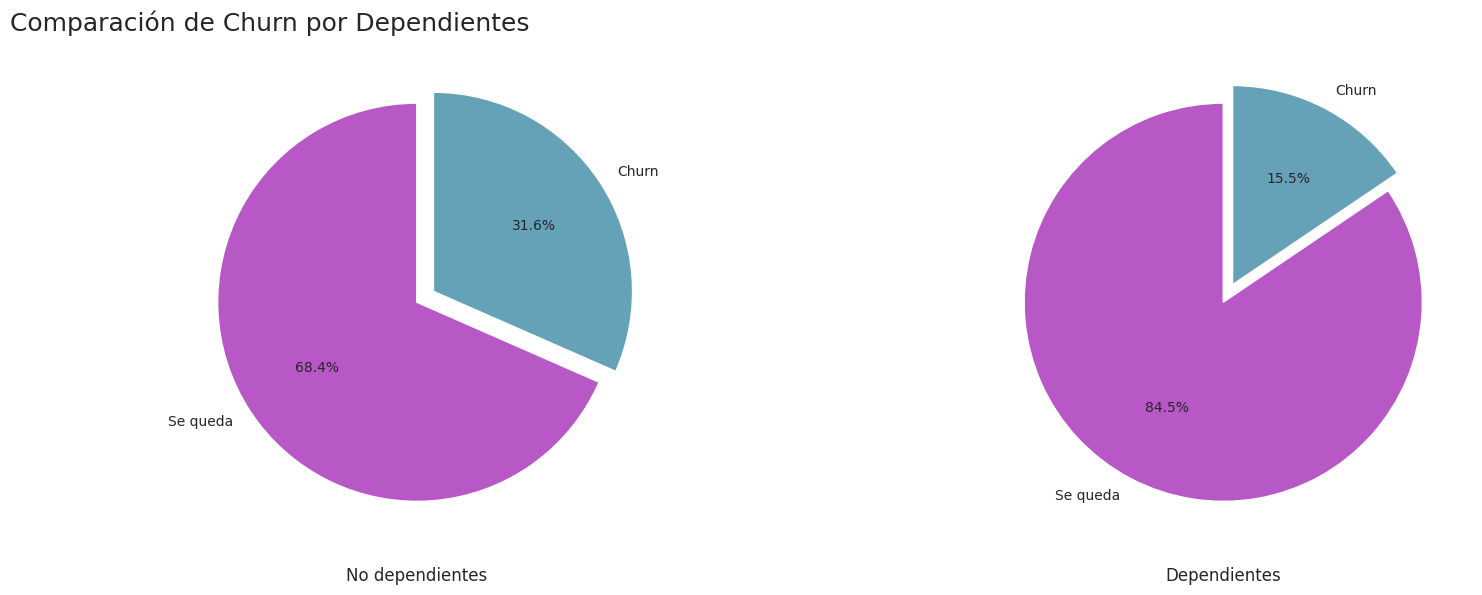

In [184]:
datos_2 = {
    'No dependientes': [68.72, 31.72],
    'Dependientes': [84.46, 15.53],

}

etiquetas = ['Se queda', 'Churn']
colores = ['#B758C6', '#66A2B7']

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for i, (dependientes, valores) in enumerate(datos_2.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{dependientes}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Dependientes', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

In [160]:
df_final[['Churn', 'Partner']].value_counts().reset_index(name='Cantidad')

,Churn,Partner,Cantidad
0,False,True,2724
1,False,False,2439
2,True,False,1200
3,True,True,669


In [161]:
tabla_churn_partner = pd.crosstab(df_final['Partner'], df_final['Churn'], normalize='index') * 100
tabla_churn_partner= tabla_churn_partner.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_partner

Churn,No_Churn (%),Churn (%)
Partner,,
False,67.023908,32.976092
True,80.282935,19.717065


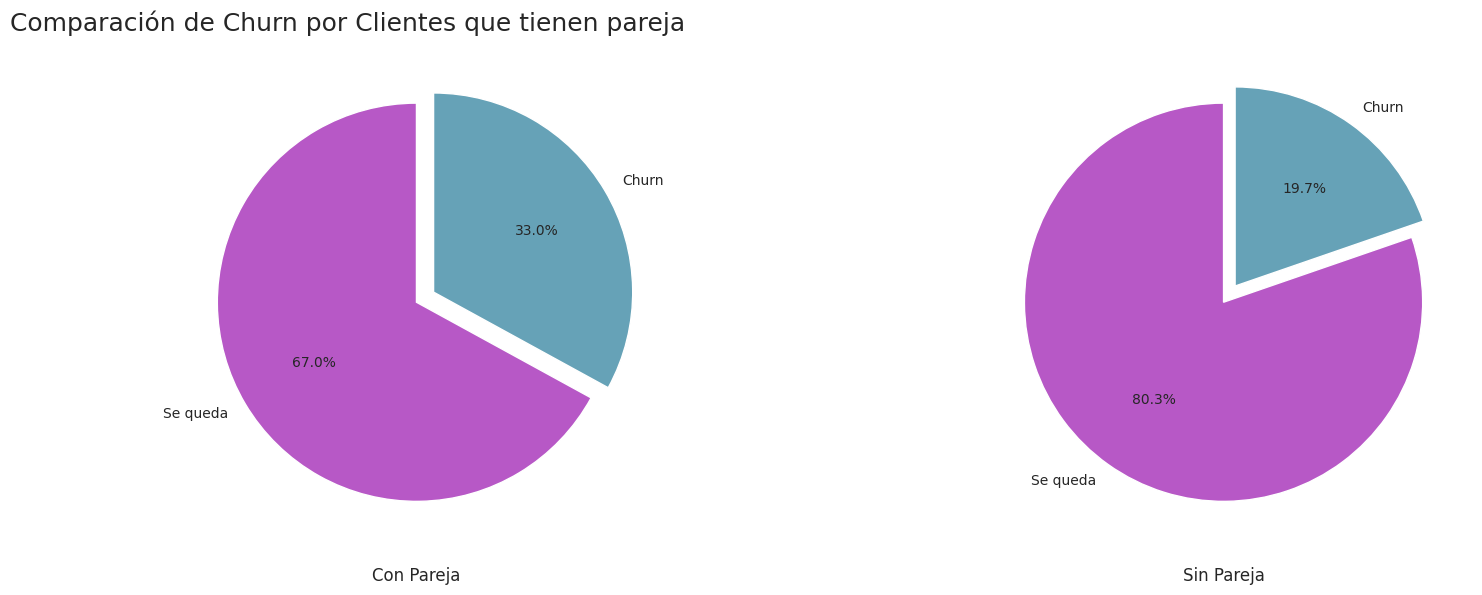

In [183]:
datos_3 = {
    'Con Pareja': [67.02, 32.97],
    'Sin Pareja': [80.28, 19.71],

}

etiquetas = ['Se queda', 'Churn']
colores = ['#B758C6', '#66A2B7']

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for i, (partner, valores) in enumerate(datos_3.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{partner}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Clientes que tienen pareja', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

In [163]:
df_final[['Churn', 'SeniorCitizen']].value_counts().reset_index(name='Cantidad')

,Churn,SeniorCitizen,Cantidad
0,False,False,4497
1,True,False,1393
2,False,True,666
3,True,True,476


In [164]:
tabla_churn_citizen = pd.crosstab(df_final['SeniorCitizen'], df_final['Churn'], normalize='index') * 100
tabla_churn_citizen = tabla_churn_citizen.rename(columns={False: 'No_Churn (%)', True: 'Churn (%)'})
tabla_churn_citizen

Churn,No_Churn (%),Churn (%)
SeniorCitizen,,
False,76.349745,23.650255
True,58.318739,41.681261


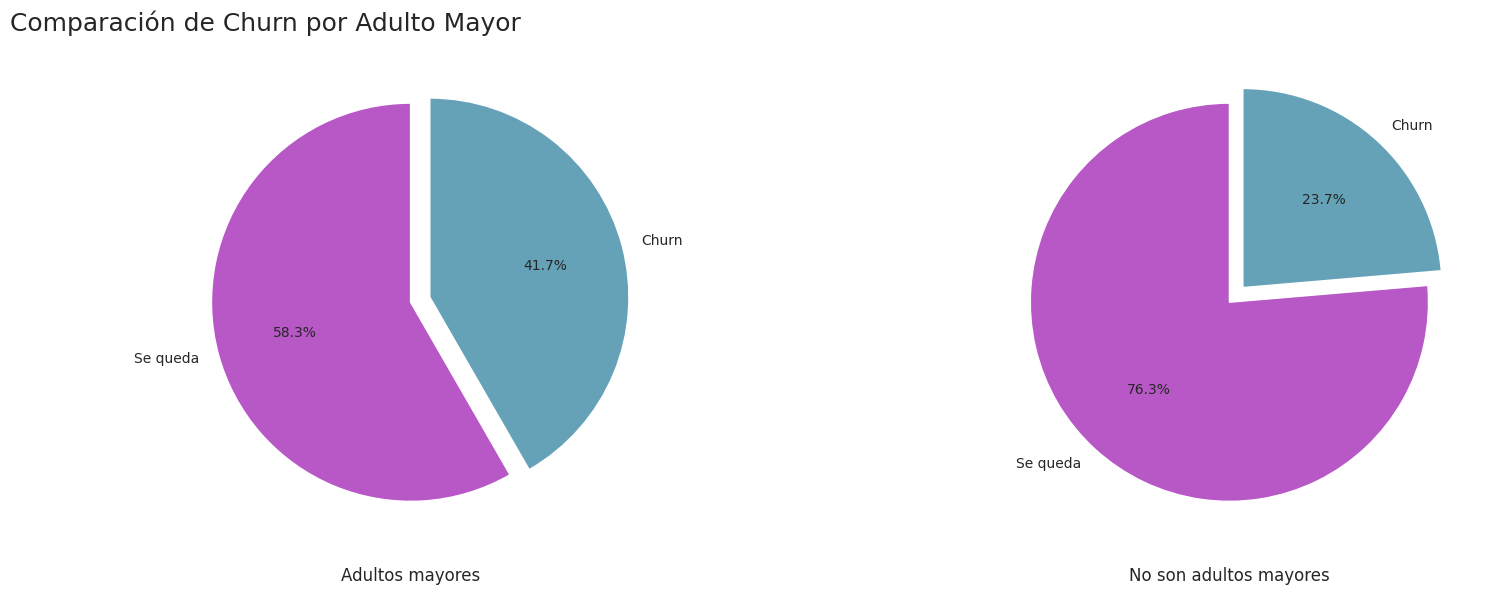

In [182]:
datos_4 = {
    'Adultos mayores': [58.31, 41.68],
    'No son adultos mayores': [76.34, 23.65],

}

etiquetas = ['Se queda', 'Churn']
colores = ['#B758C6', '#66A2B7']

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

for i, (citizen, valores) in enumerate(datos_4.items()):
    axs[i].pie(valores, labels=etiquetas, autopct='%1.1f%%',
               colors=colores, startangle=90, explode=[0, 0.1])
    axs[i].text(0, -1.4, f'{citizen}', ha='center', fontsize=12)

plt.suptitle('Comparación de Churn por Adulto Mayor', fontsize=18, x=0.05, ha='left')
plt.tight_layout()
plt.show()

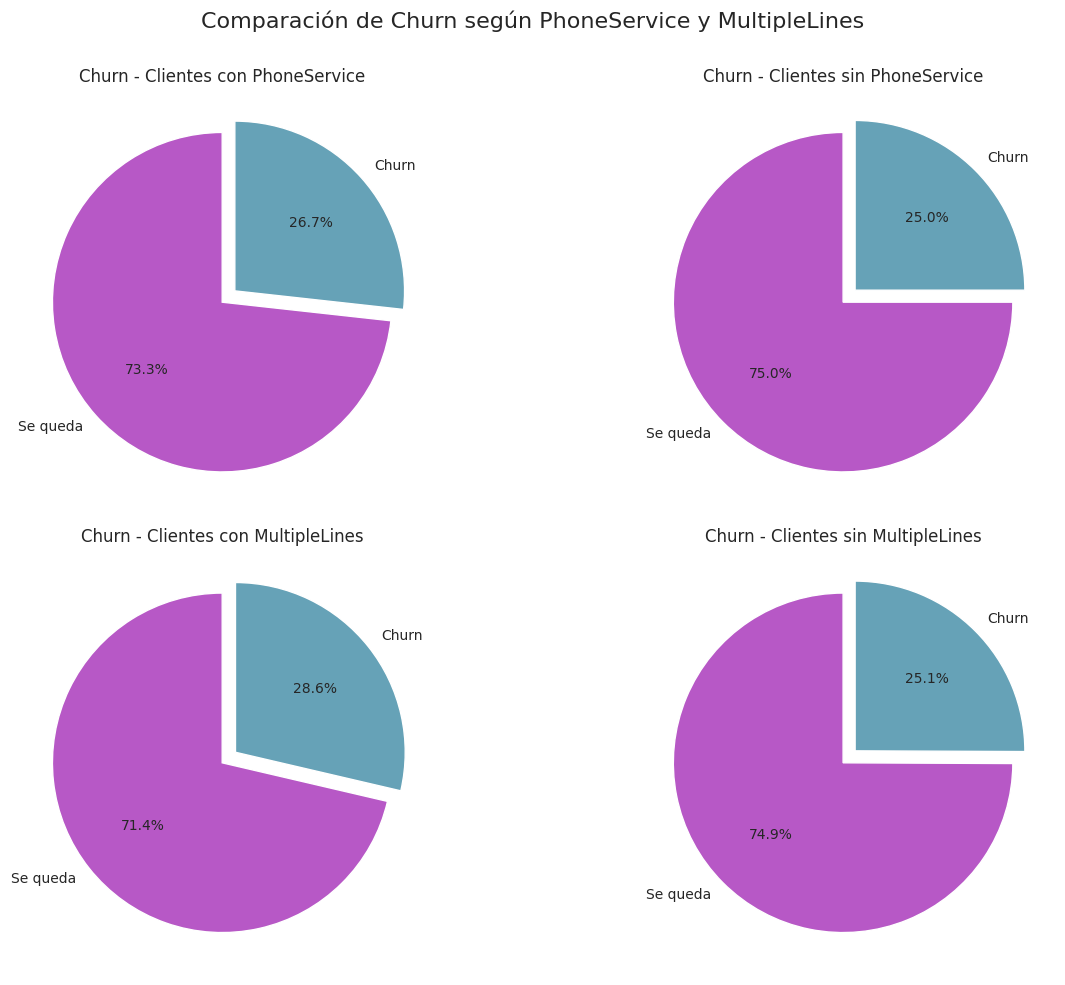

In [180]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# --- 1. PhoneService = True ---
subset1 = df_final[df_final['PhoneService'] == True]
counts1 = subset1['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[0].pie(counts1, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#B758C6', '#66A2B7'], startangle=90, explode=[0, 0.1])
axs[0].set_title('Churn - Clientes con PhoneService')

# --- 2. PhoneService = False ---
subset2 = df_final[df_final['PhoneService'] == False]
counts2 = subset2['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[1].pie(counts2, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#B758C6', '#66A2B7'], startangle=90, explode=[0, 0.1])
axs[1].set_title('Churn - Clientes sin PhoneService')

# --- 3. MultipleLines = True ---
subset3 = df_final[df_final['MultipleLines'] == True]
counts3 = subset3['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[2].pie(counts3, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#B758C6', '#66A2B7'], startangle=90, explode=[0, 0.1])
axs[2].set_title('Churn - Clientes con MultipleLines')

# --- 4. MultipleLines = False ---
subset4 = df_final[df_final['MultipleLines'] == False]
counts4 = subset4['Churn'].value_counts().reindex([False, True], fill_value=0)
axs[3].pie(counts4, labels=['Se queda', 'Churn'], autopct='%1.1f%%',
           colors=['#B758C6', '#66A2B7'], startangle=90, explode=[0, 0.1])
axs[3].set_title('Churn - Clientes sin MultipleLines')

plt.suptitle('Comparación de Churn según PhoneService y MultipleLines', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [167]:
df_final[['Churn', 'InternetService']].value_counts().reset_index(name='Cantidad')

,Churn,InternetService,Cantidad
0,False,DSL,1957
1,False,Fiber optic,1799
2,False,No,1407
3,True,Fiber optic,1297
4,True,DSL,459
5,True,No,113


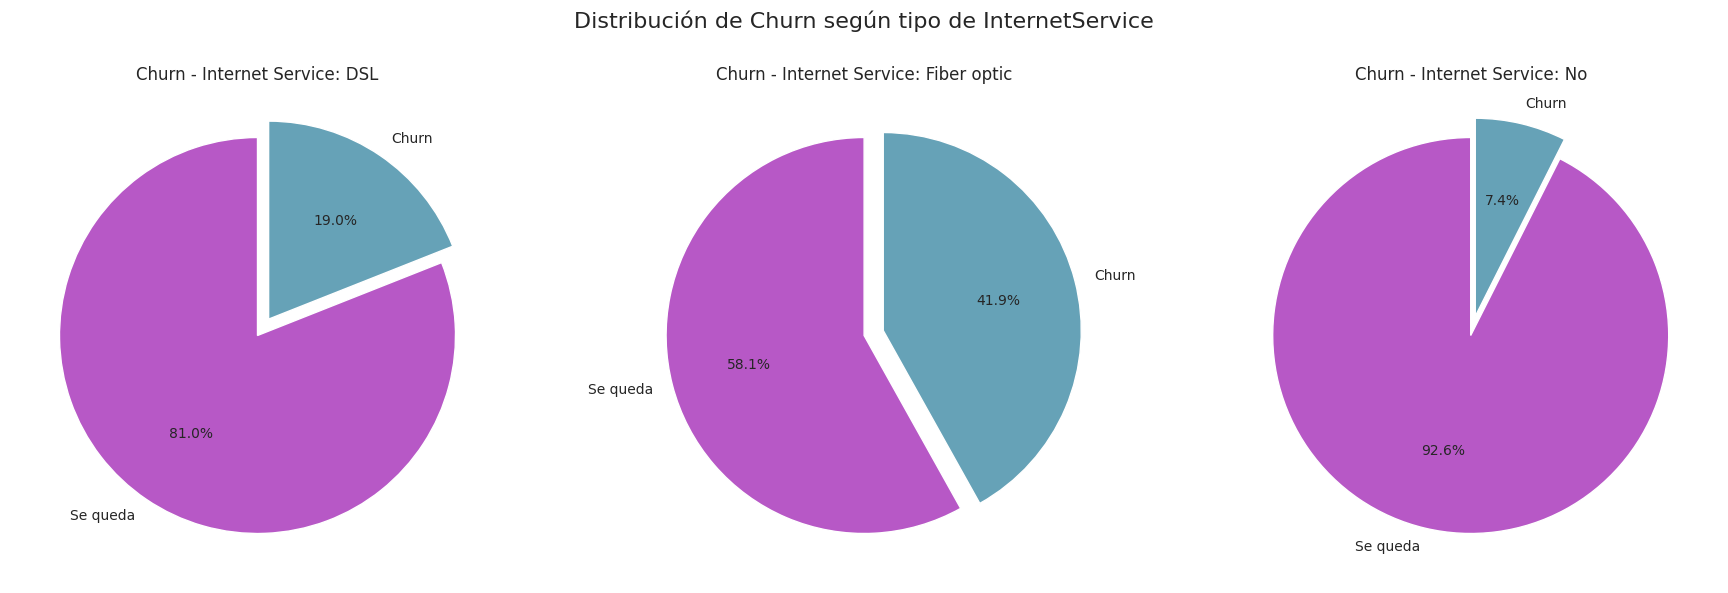

In [175]:
data = {
    'Churn': [False, False, False, True, True, True],
    'InternetService': ['DSL', 'Fiber optic', 'No', 'Fiber optic', 'DSL', 'No'],
    'Cantidad': [1957, 1799, 1407, 1297, 459, 113]
}

df_plot = pd.DataFrame(data)

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
servicios = ['DSL', 'Fiber optic', 'No']
colores = ['#B758C6', '#66A2B7']
etiquetas = ['Se queda', 'Churn']

for i, servicio in enumerate(servicios):
    # Filtrar datos del servicio actual
    sub = df_plot[df_plot['InternetService'] == servicio]
    valores = sub.sort_values('Churn')['Cantidad'].values  # orden: [False, True]

    axs[i].pie(valores,
               labels=etiquetas,
               autopct='%1.1f%%',
               colors=colores,
               startangle=90,
               explode=[0, 0.1])
    axs[i].set_title(f'Churn - Internet Service: {servicio}')

plt.suptitle('Distribución de Churn según tipo de InternetService', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### **Matriz de correlación para entender qué variables numéricas más influyen**

In [178]:
df_corr = df_final.copy()
df_corr['Churn'] = df_corr['Churn'].astype(int)

In [179]:
variables_numericas = df_corr.select_dtypes(include=['int64', 'float64', 'bool'])